# RFM Analysis
_RFM (Recency, Frequency, Monetary) analysis segments customers based on their purchase behavior: how recently, how often, and how much they buy. It helps identify key customer groups, such as big spenders, and evaluates their purchasing patterns to optimize service and targeted promotional campaigns._

- Recency (R): Who have purchased recently? Number of days since last purchase (least recency)
- Frequency (F): Who has purchased frequently? It means the total number of purchases. ( high frequency)
- Monetary Value(M): Who have high purchase amount? It means the total money customer spent (high monetary value)


In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

In [2]:
trans = pd.read_csv('Transactions_Cleaned.csv')
cust = pd.read_csv('CustomerDemographic_Cleaned.csv')

In [3]:
trans.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82


In [4]:
cust.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,71
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,44
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,71
3,4,Talbot,NaN,Male,33,1961-10-03,Missing,IT,Mass Customer,N,No,7.0,63
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Missing,Affluent Customer,N,Yes,8.0,47


## Merging both Cust and Trans table 

In [5]:
merged_trans_cust=pd.merge(trans,cust,left_on='customer_id',right_on='customer_id',how='inner')

In [6]:
merged_trans_cust.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,70
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,46
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,Male,9,1977-06-03,Desktop Support Technician,Retail,Affluent Customer,N,No,22.0,47
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,Male,83,1962-01-14,Staff Scientist,Financial Services,Mass Customer,N,No,16.0,63
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,Female,29,1996-12-15,Missing,Retail,Affluent Customer,N,Yes,2.0,28


In [7]:
merged_trans_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19354 entries, 0 to 19353
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19354 non-null  int64  
 1   product_id                           19354 non-null  int64  
 2   customer_id                          19354 non-null  int64  
 3   transaction_date                     19354 non-null  object 
 4   online_order                         19354 non-null  float64
 5   order_status                         19354 non-null  object 
 6   brand                                19354 non-null  object 
 7   product_line                         19354 non-null  object 
 8   product_class                        19354 non-null  object 
 9   product_size                         19354 non-null  object 
 10  list_price                           19354 non-null  float64
 11  standard_cost               

- Datatype of transaction date to be changed to datetime format

In [8]:
merged_trans_cust['transaction_date']=pd.to_datetime(merged_trans_cust['transaction_date'])

## RFM Analysis Table

In [14]:
merged_trans_cust['transaction_date'] = merged_trans_cust['transaction_date'].apply(lambda x: x.replace(year=x.year - 5))


In [15]:
#Latest Transaction Date
max_trans_date = max(merged_trans_cust['transaction_date']).date()
max_trans_date

datetime.date(2024, 12, 30)

- We will take this latest transaction date as a reference to compare and find the number of days between the transaction date and latest transaction date to see the recency

In [17]:
#here we create an object comparision date
comparison_date = datetime.strptime(str(max_trans_date), "%Y-%m-%d")


- We will create a RFM table with receny,frequency and monetory data

In [18]:
rfm_table = merged_trans_cust.groupby(['customer_id']).agg({'transaction_date': lambda date : (comparison_date - date.max()).days,
                                                            'product_id' : lambda prod_id : len(prod_id), 
                                                            'Profit' : lambda p : sum(p)})

In [19]:
rfm_table.head()

,transaction_date,product_id,Profit
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
3,102,8,3362.81
4,195,2,220.57
5,16,6,2394.94


In [20]:
rfm_table.rename(columns={'transaction_date' : 'recency', 
                        'product_id' : 'frequency',
                        'Profit' : 'monetary'} , inplace=True)

In [21]:
rfm_table.head()

,recency,frequency,monetary
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
3,102,8,3362.81
4,195,2,220.57
5,16,6,2394.94


- Ranking the RFM values from 1-4 where 1 being worst and 4 being best 

In [22]:
rfm_table['r_score'] = pd.qcut(rfm_table['recency'], 4, ['4','3','2','1'])
rfm_table['f_score'] = pd.qcut(rfm_table['frequency'], 4, ['1','2','3','4'])
rfm_table['m_score'] = pd.qcut(rfm_table['monetary'], 4, ['1','2','3','4'])

In [23]:
rfm_table

,recency,frequency,monetary,r_score,f_score,m_score
customer_id,,,,,,
1,7,11,3018.09,4,4,3
2,128,3,2226.26,1,1,2
3,102,8,3362.81,1,4,3
4,195,2,220.57,1,1,1
5,16,6,2394.94,4,2,2
...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2
3497,52,3,1648.32,2,1,1
3498,127,6,3147.33,1,2,3


# Calculating RFM Score
## RFM Score is calculated by the following formula:
- 100*['r_score'].astype(int)+10*['f_score'].astype(int)+['m_score'].astype(int) 

In [25]:
rfm_table['rfm_score'] = 100*rfm_table['r_score'].astype(int)+10*rfm_table['f_score'].astype(int)+rfm_table['m_score'].astype(int)

In [26]:
rfm_table

,recency,frequency,monetary,r_score,f_score,m_score,rfm_score
customer_id,,,,,,,
1,7,11,3018.09,4,4,3,443
2,128,3,2226.26,1,1,2,112
3,102,8,3362.81,1,4,3,143
4,195,2,220.57,1,1,1,111
5,16,6,2394.94,4,2,2,422
...,...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2,112
3497,52,3,1648.32,2,1,1,211
3498,127,6,3147.33,1,2,3,123


# Assigning a title to customer

In [27]:
rfm_table['customer_title'] = pd.qcut(rfm_table['rfm_score'], 4, ['Bronze','Silver','Gold','Platinum'])
rfm_table

,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,customer_title
customer_id,,,,,,,,
1,7,11,3018.09,4,4,3,443,Platinum
2,128,3,2226.26,1,1,2,112,Bronze
3,102,8,3362.81,1,4,3,143,Bronze
4,195,2,220.57,1,1,1,111,Bronze
5,16,6,2394.94,4,2,2,422,Platinum
...,...,...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2,112,Bronze
3497,52,3,1648.32,2,1,1,211,Bronze
3498,127,6,3147.33,1,2,3,123,Bronze


# Exporting to CSV File

In [29]:
rfm_table.to_csv('Customer_Trans_RFM_Analysis.csv', index=False)

# Data Analysis and Exploration

## New Customer Age distribution

In [31]:
new_cust = pd.read_csv('NewCustomerList_Cleaned.csv')

_Creating a new column called age group_

In [32]:
new_cust['Age_Group'] = new_cust['Age'].apply(lambda x : (math.floor(x/10)+1)*10)

In [33]:
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Age_Group
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,67,70
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,55,60
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,50,60
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,46,50
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,59,60


C:\Users\srivastavash\AppData\Local\Temp\ipykernel_16336\3660391100.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_cust['Age_Group'], kde=False, bins=15,color='green')


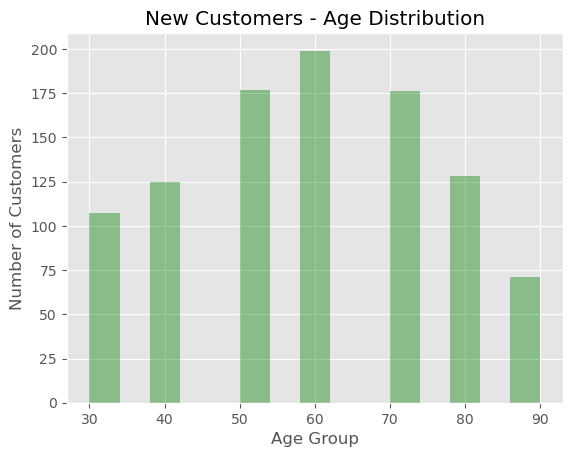

In [45]:
sns.distplot(new_cust['Age_Group'], kde=False, bins=15,color='green')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('New Customers - Age Distribution')

plt.show()


## Old Customer Age distribution

In [36]:
merged_trans_cust['Age_Group'] = merged_trans_cust['Age'].apply(lambda x : (math.floor(x/10)+1)*10)

C:\Users\srivastavash\AppData\Local\Temp\ipykernel_16336\723953596.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_trans_cust['Age_Group'], kde=False, bins=15, color='yellow')


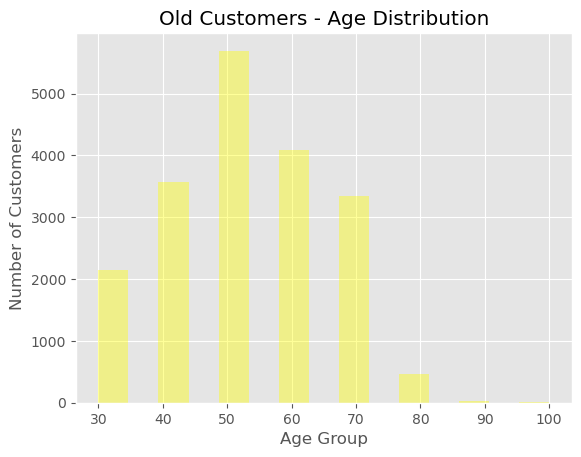

In [44]:
sns.distplot(merged_trans_cust['Age_Group'], kde=False, bins=15, color='yellow')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Age Distribution')

plt.show()

*We can see that distribution of age in NEW Customers is more vast as compared to OLD*

# Bike Related purchases over last 3 years by Gender

In [39]:
cust_bike_purchase_by_gender = merged_trans_cust.groupby('gender').agg({'past_3_years_bike_related_purchases' : sum}
                                                                 ).reset_index()
total_records = merged_trans_cust['past_3_years_bike_related_purchases'].sum()
cust_bike_purchase_by_gender['Percent_of_total'] = (cust_bike_purchase_by_gender['past_3_years_bike_related_purchases']
                                                        /total_records)*100

C:\Users\srivastavash\AppData\Local\Temp\ipykernel_16336\1047700906.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cust_bike_purchase_by_gender = merged_trans_cust.groupby('gender').agg({'past_3_years_bike_related_purchases' : sum}


In [40]:
cust_bike_purchase_by_gender

,gender,past_3_years_bike_related_purchases,Percent_of_total
0,Female,478488,50.503731
1,Male,468943,49.496269


C:\Users\srivastavash\AppData\Local\Temp\ipykernel_16336\1102005884.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender',y='Percent_of_total',data=cust_bike_purchase_by_gender, palette='magma')


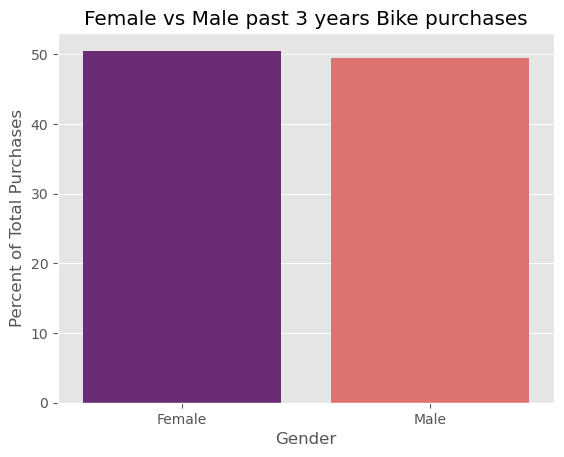

In [42]:
sns.barplot(x='gender',y='Percent_of_total',data=cust_bike_purchase_by_gender, palette='magma')
plt.xlabel('Gender')
plt.ylabel('Percent of Total Purchases')
plt.title('Female vs Male past 3 years Bike purchases')

plt.show()

# Job Industry Customer Distribution

- New Customers

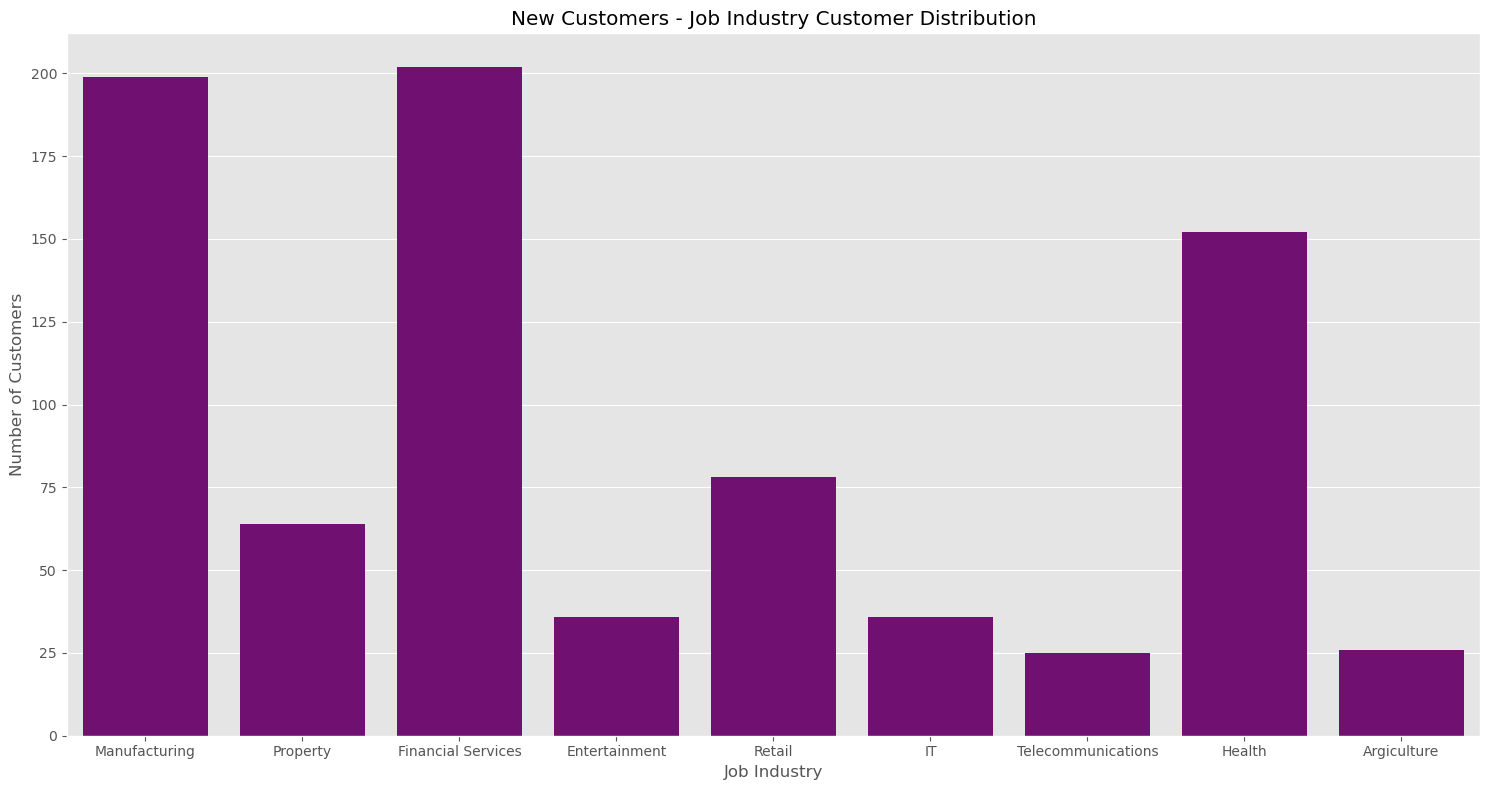

In [52]:
plt.figure(figsize=(15,8))
sns.countplot(x='job_industry_category',data=new_cust[~(new_cust['job_industry_category']=='Missing')], color='purple')
plt.xlabel('Job Industry')
plt.ylabel('Number of Customers')
plt.title('New Customers - Job Industry Customer Distribution')
plt.tight_layout()
plt.show()

- Old Customers

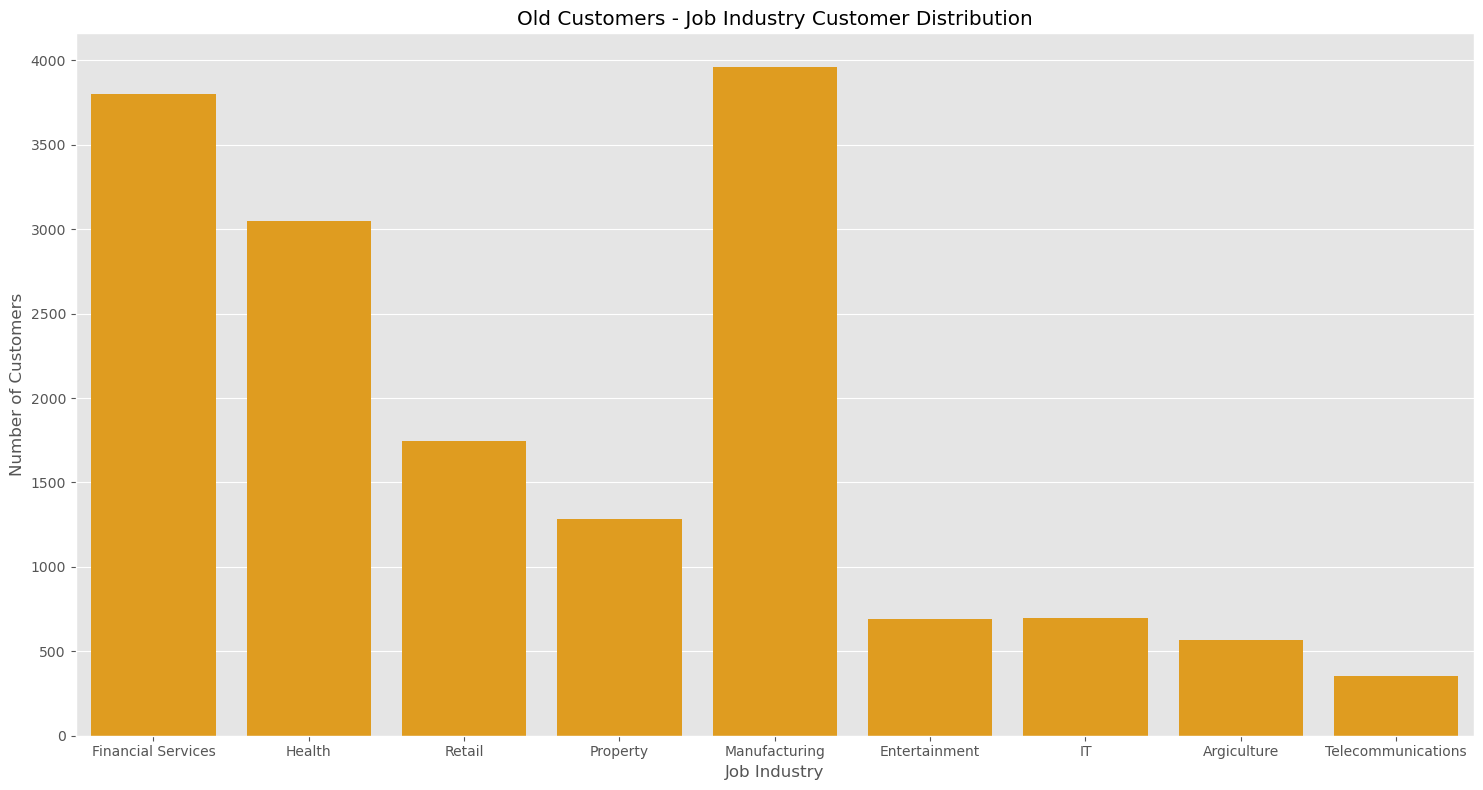

In [53]:
plt.figure(figsize=(15,8))
sns.countplot(x='job_industry_category',data=merged_trans_cust[~(merged_trans_cust['job_industry_category']=='Missing')], color='orange')
plt.xlabel('Job Industry')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Job Industry Customer Distribution')
plt.tight_layout()
plt.show()

# Car owned in each state

In [54]:
cust_addr_info = pd.read_csv('CustomerAddress_Cleaned.csv')
# Merging the previously merged data with Customer Address dataset.

cust_trans_addr = pd.merge(merged_trans_cust , cust_addr_info, left_on = 'customer_id' , 
                           right_on = 'customer_id', how='inner')

In [55]:
cust_trans_addr.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,deceased_indicator,owns_car,tenure,Age,Age_Group,address,postcode,state,country,property_valuation
0,1,2,2950,2024-02-25,0.0,Approved,Solex,Standard,medium,medium,...,N,Yes,10.0,70,80,984 Hoepker Court,3064,VIC,Australia,6
1,2,3,3120,2024-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,N,Yes,10.0,46,50,4 Shopko Circle,2196,NSW,Australia,5
2,3,37,402,2024-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,N,No,22.0,47,50,586 Miller Parkway,2835,NSW,Australia,1
3,4,88,3135,2024-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,N,No,16.0,63,70,1617 Harper Parkway,2096,NSW,Australia,10
4,5,78,787,2024-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,N,Yes,2.0,28,30,0601 Stephen Place,2292,NSW,Australia,7


In [56]:
state_car_owners = cust_trans_addr[['state' , 'owns_car' , 'customer_id']].drop_duplicates().groupby(['state', 'owns_car']).size().reset_index()

In [57]:
state_car_owners.rename(columns={0:'Number of Customers'}, inplace=True)
state_car_owners

,state,owns_car,Number of Customers
0,NSW,No,889
1,NSW,Yes,935
2,QLD,No,365
3,QLD,Yes,363
4,VIC,No,435
5,VIC,Yes,425


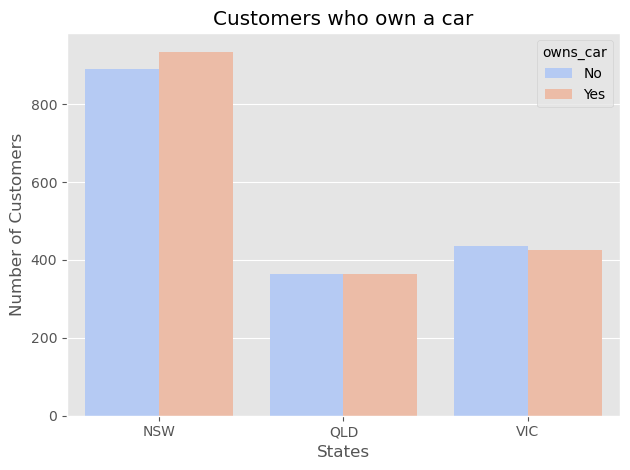

In [61]:
sns.barplot(x='state', y='Number of Customers' , hue='owns_car', data=state_car_owners,palette='coolwarm')
plt.xlabel('States')
plt.ylabel('Number of Customers')
plt.title('Customers who own a car')
plt.tight_layout()
plt.show()

# RFM Analysis via scatter plots

## Recency vs Monetary

<Figure size 800x700 with 0 Axes>

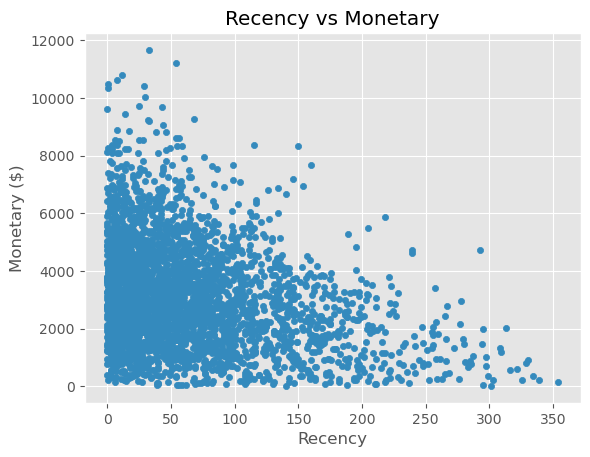

In [62]:
plt.figure(figsize=(8,7))
rfm_table.plot.scatter(x='recency' , y='monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary ($)')
plt.title('Recency vs Monetary')
plt.show()

## Frequency vs Monetary

<Figure size 800x700 with 0 Axes>

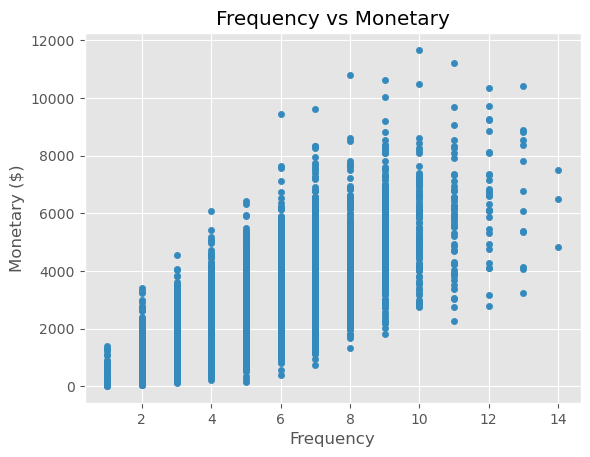

In [66]:
plt.figure(figsize=(8,7))
rfm_table.plot.scatter(x='frequency' , y='monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary ($)')
plt.title('Frequency vs Monetary')
plt.show()

# Customer Segmentation as RFM Score

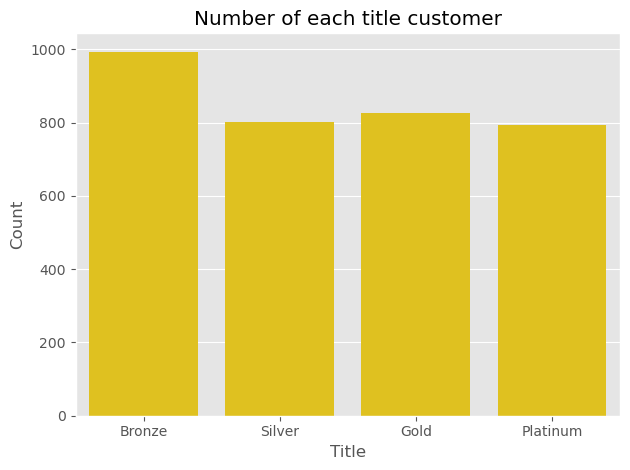

In [69]:
sns.countplot(x='customer_title', data = rfm_table, color='gold')
plt.xlabel('Title')
plt.ylabel('Count')
plt.title('Number of each title customer')
plt.tight_layout()
plt.show()